## KNTU_IPM machine learning

# excercise logistic regression

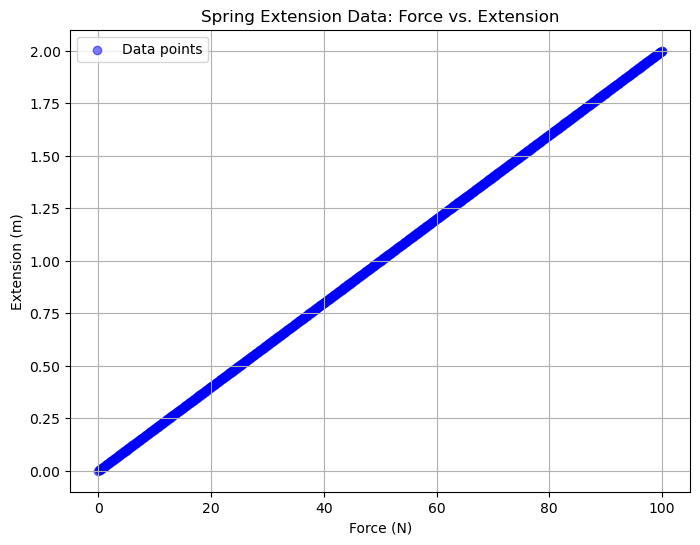

Iteration 0: Cost = 0.653727
Iteration 1000: Cost = 0.000000
Iteration 2000: Cost = 0.000000
Iteration 3000: Cost = 0.000000
Iteration 4000: Cost = 0.000000
Iteration 5000: Cost = 0.000000
Iteration 6000: Cost = 0.000000
Iteration 7000: Cost = 0.000000
Iteration 8000: Cost = 0.000000
Iteration 9000: Cost = 0.000000
Final weights: [1.         0.57792791]
Final cost (MSE/2): 0.000000


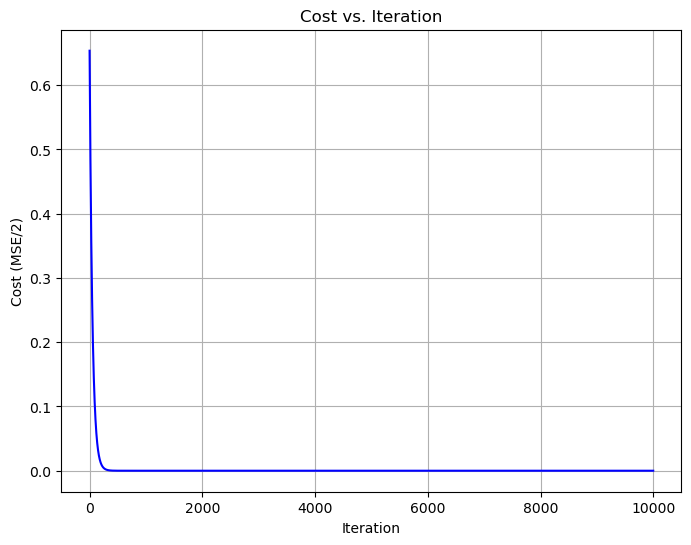

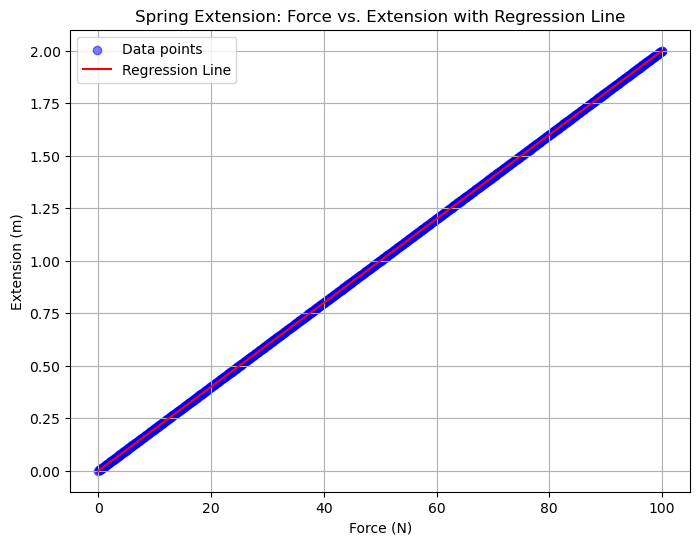

R^2 Score: 1.000000
Predicted spring constant k = 50.00 N/m


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
data = pd.read_csv("spring_extension_data.csv")

# Features and target
X = data['Force_N'].values.reshape(-1, 1)  # Feature: Force (N)
y = data['Extension_m'].values  # Target: Extension (m)

# Normalize features for gradient descent
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0) + 1e-8  # Avoid division by zero
X_norm = (X - X_mean) / X_std

# Add bias term (intercept)
X_norm = np.hstack([np.ones((X_norm.shape[0], 1)), X_norm])

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points', alpha=0.5)
plt.xlabel('Force (N)')
plt.ylabel('Extension (m)')
plt.title('Spring Extension Data: Force vs. Extension')
plt.legend()
plt.grid(True)
plt.savefig('spring_data_scatter.png')
plt.show()
plt.close()

# Step 2: Linear model function
def linear_model(X, w):
    """Compute linear predictions: y = w0 + w1*x"""
    return np.dot(X, w)

# Step 3: Cost function (Mean Squared Error)
def compute_cost(X, y, w):
    m = len(y)
    y_pred = linear_model(X, w)
    cost = (1/(2*m)) * np.sum((y_pred - y) ** 2)  # MSE with 1/2 for gradient simplicity
    return cost

# Step 4: Gradient computation
def compute_gradient(X, y, w):
    m = len(y)
    y_pred = linear_model(X, w)
    gradient = (1/m) * np.dot(X.T, (y_pred - y))
    return gradient

# Step 5: Gradient descent
def gradient_descent(X, y, w_init, alpha, num_iters):
    w = w_init.copy()
    cost_history = []
    
    for i in range(num_iters):
        gradient = compute_gradient(X, y, w)
        w -= alpha * gradient
        cost = compute_cost(X, y, w)
        cost_history.append(cost)
        
        # Print progress every 1000 iterations
        if i % 1000 == 0:
            print(f"Iteration {i}: Cost = {cost:.6f}")
    
    return w, cost_history

# Initialize parameters
w_init = np.zeros(X_norm.shape[1])  # [w0, w1]
alpha = 0.01  # Learning rate
num_iters = 10000

# Run gradient descent
w_opt, cost_history = gradient_descent(X_norm, y, w_init, alpha, num_iters)

# Print final weights and cost
print(f"Final weights: {w_opt}")
print(f"Final cost (MSE/2): {cost_history[-1]:.6f}")

# Step 6: Plot cost history
plt.figure(figsize=(8, 6))
plt.plot(range(num_iters), cost_history, color='blue')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE/2)')
plt.title('Cost vs. Iteration')
plt.grid(True)
plt.savefig('cost_history_spring.png')
plt.show()
plt.close()

# Step 7: Plot regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points', alpha=0.5)

# Generate points for the regression line
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_norm = (x_range - X_mean) / X_std
x_range_norm = np.hstack([np.ones((x_range_norm.shape[0], 1)), x_range_norm])
y_pred = linear_model(x_range_norm, w_opt)

# Plot the regression line
plt.plot(x_range, y_pred, color='red', label='Regression Line')

plt.xlabel('Force (N)')
plt.ylabel('Extension (m)')
plt.title('Spring Extension: Force vs. Extension with Regression Line')
plt.legend()
plt.grid(True)
plt.savefig('spring_regression_line.png')
plt.show()
plt.close()

# Step 8: Evaluate model (compute R^2 score)
y_pred_full = linear_model(X_norm, w_opt)
ss_tot = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
ss_res = np.sum((y - y_pred_full) ** 2)  # Residual sum of squares
r2_score = 1 - (ss_res / ss_tot)
print(f"R^2 Score: {r2_score:.6f}")

# Compute the spring constant (k = F/x, so 1/k is the slope of x vs. F)
slope = w_opt[1] / X_std[0]  # Slope in original scale
intercept = w_opt[0] - (w_opt[1] * X_mean / X_std)[0]  # Intercept in original scale
k = 1 / slope  # Spring constant k = F/x
print(f"Predicted spring constant k = {k:.2f} N/m")